3035429762 Mohammad Hasan Asim

3035433438 Connor Gabriel Daly

In [1]:
import pandas as pd

df = pd.read_csv('animal-service-intake-and-outcome-1.csv')

df.tail()

,AnimalID,AnimalType,IntakeDate,IntakeType,IntakeSubtype,PrimaryColor,PrimaryBreed,SecondaryBreed,Gender,SecondaryColor,...,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeDate,OutcomeType,OutcomeSubtype,OutcomeReason,OutcomeInternalStatus,OutcomeAsilomarStatus,ReproductiveStatusAtOutcome
150837,A591486,DOG,2016-06-02 14:48:00,OWNER SUR,OTC,YELLOW BRINDLE,GREYHOUND,MIX,NEUTERED MALE,NaN,...,NORMAL,HEALTHY,FERTILE,2016-06-25 16:22:00,ADOPTION,FRIEND,NaN,NORMAL,HEALTHY,ALTERED
150838,A523743,DOG,2014-04-16 12:05:00,STRAY,OTC,CREAM,CAIRN TERRIER,NaN,SPAYED FEMALE,NaN,...,NORMAL,HEALTHY,FERTILE,2014-04-23 15:11:00,ADOPTION,INTERNET,NaN,NORMAL,HEALTHY,ALTERED
150839,A369002,DOG,2013-01-23 13:59:00,STRAY,OTC,BLACK,MINIATURE PINSCHER,NaN,NEUTERED MALE,BROWN,...,NORMAL,HEALTHY,ALTERED,2013-01-31 14:52:00,TRANSFER,KHS,NaN,NaN,HEALTHY,ALTERED
150840,A439252,CAT,2016-08-01 17:43:00,STRAY,FIELD,BLACK TABBY,DOMESTIC MEDIUMHAIR,NaN,SPAYED FEMALE,WHITE,...,EMACIATED,HEALTHY,ALTERED,2016-08-02 14:26:00,RTO,IN KENNEL,NaN,NaN,HEALTHY,ALTERED
150841,A424601,CAT,2013-07-19 13:02:00,ET REQUEST,SICK,GRAY,DOMESTIC SHORTHAIR,NaN,SPAYED FEMALE,WHITE,...,INJURED,HEALTHY,ALTERED,2013-07-19 23:59:00,EUTH,REQUESTED,NaN,NaN,HEALTHY,ALTERED


In [2]:
df.loc[86652]
df = df[pd.notnull(df['OutcomeDate'])]
df = df[pd.notnull(df['IntakeDate'])]

In [3]:
from datetime import datetime
FMT = '%Y-%m-%d %H:%M:%S'
df['TimeInShelter'] = df.apply(lambda x: (datetime.strptime(x['OutcomeDate'], FMT) - datetime.strptime(x['IntakeDate'], FMT)).total_seconds()/3600, axis=1)

In [4]:
df.head()

,AnimalID,AnimalType,IntakeDate,IntakeType,IntakeSubtype,PrimaryColor,PrimaryBreed,SecondaryBreed,Gender,SecondaryColor,...,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeDate,OutcomeType,OutcomeSubtype,OutcomeReason,OutcomeInternalStatus,OutcomeAsilomarStatus,ReproductiveStatusAtOutcome,TimeInShelter
0,A366370,CAT,2008-11-07 10:50:00,STRAY,OTC,WHITE,DOMESTIC SHORTHAIR,NaN,NEUTERED MALE,BROWN,...,HEALTHY,ALTERED,2008-11-12 15:46:00,EUTH,FERAL,NaN,NaN,UNHEALTHY/UNTREATABLE,ALTERED,124.933333
1,A366531,CAT,2008-11-10 10:20:00,STRAY,OTC,BLACK,DOMESTIC SHORTHAIR,DOMESTIC SHORTHAIR,UNKNOWN,NaN,...,HEALTHY,UNKNOWN,2008-11-19 20:10:00,EUTH,CONTAG DIS,NaN,SICK,HEALTHY,UNKNOWN,225.833333
2,A532367,BIRD,2014-07-23 23:21:00,CONFISCATE,CRUELTY,RED,CHICKEN,NaN,MALE,BLACK,...,HEALTHY,FERTILE,2014-11-05 15:49:00,TRANSFER,NaN,NaN,NaN,HEALTHY,FERTILE,2512.466667
3,A532474,OTHER,2014-07-24 18:29:00,ET REQUEST,NaN,BROWN,BAT,NaN,UNKNOWN,NaN,...,HEALTHY,UNKNOWN,2014-07-24 23:59:00,EUTH,MEDICAL,NaN,OTHER,HEALTHY,UNKNOWN,5.500000
4,A281756,DOG,2006-09-11 18:10:00,OWNER SUR,OTC,WHITE,PIT BULL TERRIER,NaN,MALE,BROWN,...,HEALTHY,FERTILE,2006-09-12 13:44:00,EUTH,TIME/SPACE,NaN,NaN,HEALTHY,FERTILE,19.566667


As we are interested in predicting outcomes of an animal when it arrives in the shelter, we cannot use outcome sub features for creating a model. AnimalID was also removed as it will have little bearing on the animal's outcome

In [5]:
df=df.drop(['OutcomeReason', 'OutcomeInternalStatus','OutcomeDate','OutcomeSubtype','IntakeSubtype','OutcomeAsilomarStatus','ReproductiveStatusAtOutcome','SecondaryBreed','AnimalID'], axis=1)

In [6]:
len(df)

150640

The dataset originally has 150640 records

In [8]:
df['InMonth'] = df.apply(lambda x: datetime.strptime(x['IntakeDate'], FMT).month, axis=1)

In [9]:
df['InDate'] = df.apply(lambda x: datetime.strptime(x['IntakeDate'], FMT).day, axis=1)

In [10]:
df['InTime'] = df.apply(lambda x: datetime.strptime(x['IntakeDate'], FMT).hour*60+datetime.strptime(x['IntakeDate'], FMT).minute, axis=1)

In [11]:
df['InDay'] = df.apply(lambda x: datetime.strptime(x['IntakeDate'], FMT).weekday(), axis=1)

In order to compare records we first had to seperate date time into its constituent components.

In [12]:
df.head()
#df = df.drop(['IntakeDate'], axis=1)

,AnimalType,IntakeDate,IntakeType,PrimaryColor,PrimaryBreed,Gender,SecondaryColor,DOB,IntakeReason,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeType,TimeInShelter,InMonth,InDate,InTime,InDay
0,CAT,2008-11-07 10:50:00,STRAY,WHITE,DOMESTIC SHORTHAIR,NEUTERED MALE,BROWN,NaN,NaN,FEARFUL,HEALTHY,ALTERED,EUTH,124.933333,11,7,650,4
1,CAT,2008-11-10 10:20:00,STRAY,BLACK,DOMESTIC SHORTHAIR,UNKNOWN,NaN,NaN,STRAY,NORMAL,HEALTHY,UNKNOWN,EUTH,225.833333,11,10,620,0
2,BIRD,2014-07-23 23:21:00,CONFISCATE,RED,CHICKEN,MALE,BLACK,NaN,NaN,OTHER,HEALTHY,FERTILE,TRANSFER,2512.466667,7,23,1401,2
3,OTHER,2014-07-24 18:29:00,ET REQUEST,BROWN,BAT,UNKNOWN,NaN,NaN,NaN,OTHER,HEALTHY,UNKNOWN,EUTH,5.500000,7,24,1109,3
4,DOG,2006-09-11 18:10:00,OWNER SUR,WHITE,PIT BULL TERRIER,MALE,BROWN,2005-09-11 00:00:00,NO TIME,NORMAL,HEALTHY,FERTILE,EUTH,19.566667,9,11,1090,0


In [13]:
import numpy as np
daymin = 24*60
df['sin_time'] = np.sin(2*np.pi*df.InTime/daymin)
df['cos_time'] = np.cos(2*np.pi*df.InTime/daymin)

df['sin_dat'] = np.sin(2*np.pi*df.InDate/30.5)
df['cos_dat'] = np.cos(2*np.pi*df.InDate/30.5)
df.drop('InTime', axis=1, inplace=True)
df.drop('InDate', axis=1, inplace=True)

We thought there may be a correlation between day of the month and time in the day at which the animal reached the shelter. As these are cyclical features, we had to research ways in which this could be shown. Ultimately we settled on a method, transforming with both sin and cos to create 2 new functions.

df.head()

In [14]:
df = df[pd.notnull(df['PrimaryColor'])]

We then removed records with no primary color value (17 records)

In [15]:
len(df)

150623

In [16]:
df=df[pd.notnull(df['DOB'])]

In [17]:
FMT = '%Y-%m-%d %H:%M:%S'
df['ageAtShelt'] = df.apply(lambda x: (datetime.strptime(x['IntakeDate'], FMT) - datetime.strptime(x['DOB'], FMT)).total_seconds()/(86400*30.5), axis=1)

We decided that the age of the animal at the time it was taken in by the shelter would impact how likely the animal is to be adopted and the time taken it would take to be adopted, therefore we removed all records with no DOB. Using the DOB and Intake date we calculated the age of the animal (in months) when it reached the shelter.

In [18]:
df = df.drop(['IntakeDate','DOB'],axis=1)

In [19]:
df= df.loc[df['AnimalType'].isin(['CAT','DOG'])]
cn = df.loc[df['OutcomeType']=='ADOPTION']
cn = cn.loc[cn['TimeInShelter'] <= 5000]
df= df.loc[df['OutcomeType'].isin(['ADOPTION','TRANSFER', 'RTO', 'FOSTER', 'RELEASED', 'TNR'])]
cf = cn.drop(['sin_time','cos_time','sin_dat','cos_dat'],axis=1)
cn = cn.drop(['OutcomeType'],axis=1)
cf = cf.drop(['OutcomeType'],axis=1)
cv = cn.drop(['PrimaryColor','SecondaryColor'],axis=1)

In [20]:
cv = pd.get_dummies(cv,columns=['IntakeType','PrimaryBreed','Gender','IntakeReason','InDay','InMonth','ReproductiveStatusAtIntake','IntakeAsilomarStatus','IntakeInternalStatus','AnimalType'])
cf = pd.get_dummies(cf,columns=['IntakeType','PrimaryColor','PrimaryBreed','Gender','IntakeReason','InDay','InMonth','ReproductiveStatusAtIntake','IntakeAsilomarStatus','IntakeInternalStatus','SecondaryColor','AnimalType'])
cn = pd.get_dummies(cn,columns=['IntakeType','PrimaryColor','PrimaryBreed','Gender','IntakeReason','InDay','InMonth','ReproductiveStatusAtIntake','IntakeAsilomarStatus','IntakeInternalStatus','SecondaryColor','AnimalType'])

In [21]:
df = pd.get_dummies(df,columns=['IntakeType','PrimaryColor','PrimaryBreed','Gender','IntakeReason','InDay','InMonth','ReproductiveStatusAtIntake','IntakeAsilomarStatus','IntakeInternalStatus','SecondaryColor','AnimalType','OutcomeType'])

For the numerous categorical such as Animal breed and Type etc, we performed one-hot vectoring, as there is no sort of ordering to the categories, so it would not make sense to give the features numerical labels.

In [22]:
len(cf)

22464

In [23]:
st = cn.sample(frac=0.4)

In [24]:
Y = st.TimeInShelter
st=st.drop('TimeInShelter', axis=1)
X= st
X.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

,sin_time,cos_time,sin_dat,cos_dat,ageAtShelt,IntakeType_CONFISCATE,IntakeType_ET REQUEST,IntakeType_FOSTER,IntakeType_FOUND,IntakeType_INVESTIGAT,...,SecondaryColor_SOLID,SecondaryColor_TAN,SecondaryColor_TORTIE,SecondaryColor_TORTIE POINT,SecondaryColor_TRICOLOR,SecondaryColor_WHITE,SecondaryColor_YELLOW,SecondaryColor_YELLOW BRINDLE,AnimalType_CAT,AnimalType_DOG
134315,0.011384,0.393911,0.013224,0.616222,0.189758,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0
136725,0.147993,0.144907,0.036733,0.312007,0.238894,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,1.0,0.0
84733,0.337216,0.027241,0.085137,0.220947,0.409239,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0
90462,0.207875,0.094213,0.868216,0.841762,0.231948,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,0.0,1.0
140911,0.504363,0.000019,0.942736,0.265227,0.189589,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0
97307,0.280814,0.050603,0.603110,0.992052,1.000000,0.0,0.0,1.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0
16382,0.415325,0.992778,0.526446,0.000000,0.219227,0.0,0.0,0.0,0.0,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0
110595,0.012815,0.387524,0.007948,0.411059,0.230992,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0
124240,0.400316,0.010038,0.013224,0.616222,0.290668,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0
139201,0.170327,0.875920,0.013224,0.616222,0.333340,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0


We scaled the values to be between 0 and 1 on account of the one-hot vectoring for categorical features

In [25]:
X = np.array(X)
y = np.array(Y)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.22)

# Model Selection

In [213]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score

We initially tried a simple linear regression model

In [218]:
lin = LinearRegression()
lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

This model gave an explained variance score of 0.2 and an R2 score of 0.2. Suggesting the model accounted for some of the variability of the response data around the mean

In [219]:
tin = lin.predict(X_test)
explained_variance_score(y_test, tin) 

0.20230595182926192

In [220]:
r2_score(y_test, tin)

0.20194019021434328

In [221]:
from sklearn.linear_model import RidgeCV

In [222]:
red = RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, normalize=False, scoring=None, cv=None, gcv_mode=None, store_cv_values=False)

red.fit(X_train,y_train)




RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

We then tried a Ridge Regression model. This showed a much better improvement, with much higher R2 and explained variance scores. The scores appeared initially quite low (R2 around 0.21, explained variance also around 0.21), however upon further research, we have found that it is quite usual for models in social science fields to have R2 values far below 0.5.

In [223]:
from sklearn.metrics import explained_variance_score, r2_score

tdf = red.predict(X_test)
explained_variance_score(y_test, tdf) 

0.22143423949394558

In [224]:
r2_score(y_test, tdf) 

0.22086963029141848

In [248]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=10, gamma=0.001)
svr_rbf.fit(X_train,y_train)




SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [249]:

ypred = svr_rbf.predict(X_test)


We then tried using Support Vector Regression with an RBF kernel. The results showed a large decrease in r2_score and explained variance. Accordingly, we tried tuning the hyperparameters using grid search

In [250]:
from sklearn.metrics import explained_variance_score, r2_score
explained_variance_score(y_test, ypred) 

0.011655796942951824

In [251]:
r2_score(y_test, ypred) 

-0.10572746160175939

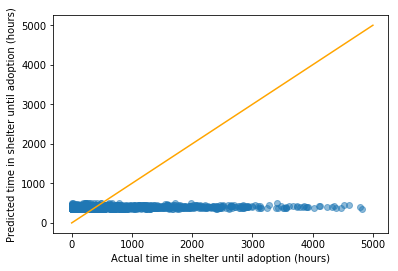

In [252]:
import numpy as np
import matplotlib.pyplot as plt
x = y_test
y = ypred
xe = [x for x in range(5000)]
ye = [y for y in range(5000)]
plt.plot(xe,ye, color = 'orange')
plt.ylabel('Predicted time in shelter until adoption (hours)')
plt.xlabel('Actual time in shelter until adoption (hours)')

plt.scatter(x, y, alpha=0.5)
plt.show()

As shown by this graph plotting actual time vs predicted, there is a huge amount of variance in this model from the ideal model where y=x. We sought to improve this using cross validation with gridsearch to find better parameters for the RBF SVR.

In [230]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.1,1e-2,1e-3],
                     'C': [10, 100, 1000, 5000]}]





In [231]:
clf = GridSearchCV(SVR(), tuned_parameters, cv=3,scoring='explained_variance')
clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.1, 0.01, 0.001], 'C': [10, 100, 1000, 5000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='explained_variance', verbose=0)

In [232]:
print("Best parameters set found on development set:")
print()
print(clf.best_params_)



Best parameters set found on development set:

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}


In [233]:
fed = SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
fed.fit(X_train,y_train)




yes = fed.predict(X_test)



In [234]:
explained_variance_score(y_test, yes)

0.24304865110855689

In [235]:
r2_score(y_test, yes)

0.22734552263334984

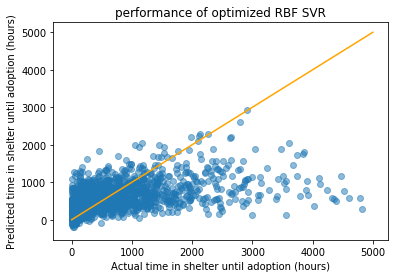

In [253]:
import numpy as np
import matplotlib.pyplot as plt
x = y_test
y = yes
xe = [x for x in range(5000)]
ye = [y for y in range(5000)]
plt.plot(xe,ye, color = 'orange')
plt.ylabel('Predicted time in shelter until adoption (hours)')
plt.xlabel('Actual time in shelter until adoption (hours)')
plt.title('performance of optimized RBF SVR')

plt.scatter(x, y, alpha=0.5)
plt.show()

The parameters using grid search to find parameters for the rbf SVR model, along with 3 split k-fold cross validation, returned a model with explained variance of 0.24, and r2 score of 0.23. This shows much improved performance over the original RBF SVR.

In [254]:
acd = []
ard = []

for t in range(1,4):
    svr_poly = SVR(kernel='poly', C=1e3, degree=t)
    svr_poly.fit(X_train,y_train)
    ypol = svr_poly.predict(X_test)
    ars = explained_variance_score(y_test, ypol)
    rs = r2_score(y_test, ypol)
    acd.append(ars)
    ard.append(rs)
    

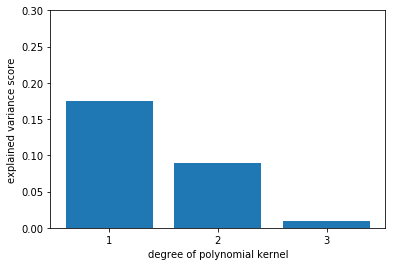

In [263]:
import matplotlib.pyplot as plt

pols=[1,2,3]


y_pos = np.arange(len(pols))

low = min(acd)
high = max(acd)
plt.ylim([0, 0.3])
plt.bar(y_pos, acd, align='center')
plt.xticks(y_pos, pols)
plt.ylabel('explained variance score')
plt.xlabel('degree of polynomial kernel')


 
plt.show()

In [262]:
print(acd[0])
print(acd[1])
print(acd[2])

0.175352886615
0.0895351470364
0.00877100559013


The linear kernel performed the best amongst linear and polynomial kernels of degree 2 and 3, with an explained variance score of 0.175, however this is still worse than RBF.

In [260]:
print(ard[0])

0.0997624852331


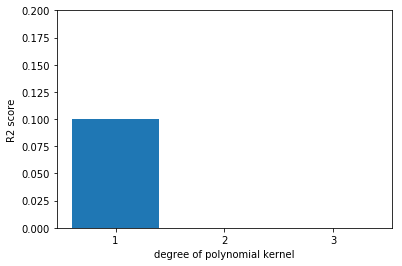

In [261]:
import matplotlib.pyplot as plt

pols=[1,2,3]

objed = [x for x in range(3,11)]
y_pos = np.arange(len(pols))

low = min(ard)
high = max(ard)
plt.ylim([0, 0.2])
plt.bar(y_pos, ard, align='center')
plt.xticks(y_pos, pols)
plt.ylabel('R2 score')
plt.xlabel('degree of polynomial kernel')

 
plt.show()

Similarly, the R2 score of the linear kernel was better than polynomial of degree 2 and 3. However, with a value of 0.1, performed far worse than the RBF kernel

Trying to improve on the score of the RBF kernel, we then tried using decision trees.

In [279]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

regr_2 = DecisionTreeRegressor(max_depth=4)
regr_2.fit(X_train, y_train)

y_2 = regr_2.predict(X_test)


In [280]:
explained_variance_score(y_test, y_2)

0.1713740383942095

In [281]:
r2_score(y_test, y_2)

0.16953079820505923

In [283]:
acc = []


for i in range(2,11):
    
    regr_t = DecisionTreeRegressor(max_depth=i)
    regr_t.fit(X_train, y_train)

    y_t = regr_t.predict(X_test)
    g= explained_variance_score(y_test, y_t)
    acc.append(g)
    

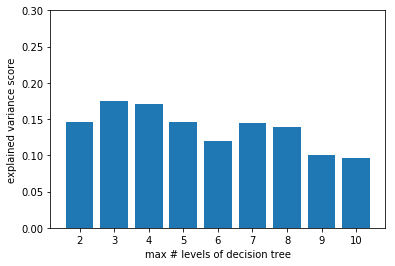

In [290]:
import matplotlib.pyplot as plt
objed = [x for x in range(2,11)]
y_pos = np.arange(len(objed))

low = min(acc)
high = max(acc)
plt.ylim([0, 0.3])
plt.bar(y_pos, acc, align='center')
plt.xticks(y_pos, objed)
plt.ylabel('explained variance score')
plt.xlabel('max # levels of decision tree')


 
plt.show()

In [285]:
acc[1]

0.1756252679595014

From the graph, we can see by setting the max number of levels within the tree to 6 we get the highest explained variance score. However at 0.21, this is still a worse performance than RBF SVR and ridge regression. Accordingly we then decided to try ensemble learning with a random forests model.

In [286]:
from sklearn.ensemble import RandomForestRegressor





atv = []
atr = []


for i in range(2,11):
    
    regr_f= RandomForestRegressor(max_depth=i, random_state=0)
    regr_f.fit(X_train, y_train)

    yrf = regr_f.predict(X_test)
    g= explained_variance_score(y_test, yrf)
    r= r2_score(y_test, yrf)
    atv.append(g)
    atr.append(r)
  

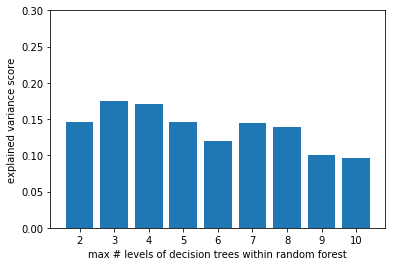

In [289]:
import matplotlib.pyplot as plt
objed = [x for x in range(2,11)]
y_pos = np.arange(len(objed))

low = min(atv)
high = max(atv)
plt.ylim([0, 0.3])
plt.bar(y_pos, acc, align='center')
plt.xticks(y_pos, objed)
plt.ylabel('explained variance score')
plt.xlabel('max # levels of decision trees within random forest')


 
plt.show()

In [311]:
atv[1]

0.18600118441632829

Again, by setting max number of levels within the trees of the random forest to 6, we get the highest explained variance score, however although an imporvement over a single decision tree, at 0.23 the performance is equal to SVR, we still needed a better performance, so we then looked to neural networks, specically Multi Layer Perceptrons.

In [291]:
from sklearn.neural_network import MLPRegressor

In [292]:
MLP =MLPRegressor(hidden_layer_sizes=(200,),activation= 'relu',learning_rate='constant',max_iter = 10000)

In [293]:
MLP.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [294]:
ms = MLP.predict(X_test)

In [295]:
from sklearn.metrics import explained_variance_score, r2_score
explained_variance_score(y_test, ms)

0.22966635154410331

In [296]:
r2_score(y_test, ms)

0.22964033795787275

Trying an MLP with 1 hidden layer of size 200, we get explained variance of 0.23 and r2 of 0.23, a similar performance to that of RBF SVR and ridge regression

In [299]:
mx = 0
iv=0
jv=0

for i in range(1,6):
    for j in range(1,6):
        
        MtLP =MLPRegressor(hidden_layer_sizes=(i*50,j*50,),activation= 'relu',learning_rate='constant',max_iter = 10000)
        MtLP.fit(X_train,y_train)
        mts = MtLP.predict(X_test)
        a = explained_variance_score(y_test, mts)
        if(a>mx):
            mx=a
            iv=i
            jv=j
                
            
            

In [300]:
print(mx)
print(iv)

print(jv)


0.241451609612
1
1


Increasing the number of hidden layers to 2, and alternating the sizes of each layer, in increments of 50, between 50 and 250 (as we found a good rule of thumb for layer size is < total number of features) we found with a first layer of size 50, second of size 50, this gave an explained variance value of 0.24

In [301]:
mrx = 0
irv=0


for i in range(1,8):
    
        
    MtLP =MLPRegressor(hidden_layer_sizes=(i*50,),activation= 'relu',learning_rate='constant',max_iter = 10000)
    MtLP.fit(X_train,y_train)
    mrts = MtLP.predict(X_test)
    a = explained_variance_score(y_test, mrts)
    if(a>mrx):
        mrx=a
        irv=i
            

In [302]:
print(mrx)
print(irv)

0.239769685002
6


Trying with just one layer, the explained variance score decreased to 0.24 with optimal layer size of 300, same as the optimal config of 2 layered model.

In [349]:
from sklearn.model_selection import GridSearchCV
net_parameters = [{'activation': ['identity', 'logistic', 'tanh', 'relu']}]
mel = GridSearchCV(MLPRegressor(hidden_layer_sizes=(300),learning_rate='constant',max_iter = 10000), net_parameters, cv=3,scoring='explained_variance')


In [350]:
mel.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=300, learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'activation': ['identity', 'logistic', 'tanh', 'relu']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='explained_variance', verbose=0)

In [351]:
print("Best parameters set found on development set:")
print()
print(mel.best_params_)

Best parameters set found on development set:

{'activation': 'logistic'}


In [28]:
from sklearn.neural_network import MLPRegressor
ste = MLPRegressor(activation='logistic',hidden_layer_sizes=(300,), learning_rate='constant',max_iter=10000)


ste.fit(X_train,y_train)
stem = ste.predict(X_test)




In [31]:
from sklearn.metrics import explained_variance_score, r2_score


In [32]:

v1= explained_variance_score(y_test,stem)
print(v1)

0.238221484336


In [33]:
r1 =r2_score(y_test,stem)
print(r1)

0.237719291635


Using 3 k-fold cross validation alongside grid search, alternating the activation function, we found that on average, the logistic function gave the best performance, when used on the entire training set, gave an explained variance score of 0.24, and an r2 score of 0.24. Despite trying many different models and parameters, we were unable to pass an R2 or explained variance score of 0.24 and 0.24 respectively. To this end, we tried feature engineering.

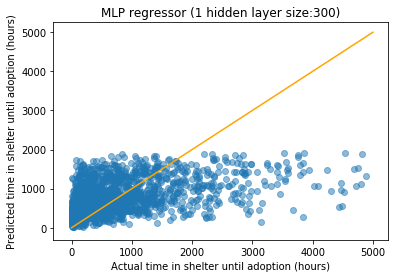

In [34]:
import numpy as np
import matplotlib.pyplot as plt
x = y_test
y = stem
xe = [x for x in range(5000)]
ye = [y for y in range(5000)]
plt.plot(xe,ye, color = 'orange')
plt.ylabel('Predicted time in shelter until adoption (hours)')
plt.xlabel('Actual time in shelter until adoption (hours)')
plt.title('MLP regressor (1 hidden layer size:300)')
plt.scatter(x, y, alpha=0.5)
plt.show()

As shown above, although there the MLP with 1 hidden layer performed the best, the level of variance between estimated and actual remained very large 

# Feature Engineering

First we tried removing the colour features of the animals

In [35]:
s = cv.sample(frac=0.4)
Y1 = s.TimeInShelter
X1= s.drop('TimeInShelter', axis=1)

X1.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
X1 = np.array(X1)
y1 = np.array(Y1)

In [36]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1,test_size=0.22)

In [37]:
from sklearn.linear_model import RidgeCV
red1 = RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, normalize=False, scoring=None, cv=None, gcv_mode=None, store_cv_values=False)

red1.fit(X_train1,y_train1)

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [38]:
reds = red1.predict(X_test1)


In [39]:
from sklearn.metrics import explained_variance_score, r2_score

explained_variance_score(y_test1, reds) 

0.19961892715287644

In [40]:
r2_score(y_test1, reds) 

0.19860490490579807

Using ridge regression, this gave a slight decrease in performance to the original dataset (with explained variance and r2 scores of both 0.2).

In [41]:
from sklearn.neural_network import MLPRegressor
MIND =MLPRegressor(hidden_layer_sizes=(300,),activation= 'logistic',learning_rate='constant',max_iter = 10000)

In [42]:
MIND.fit(X_train1,y_train1)

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [43]:
from sklearn.metrics import explained_variance_score, r2_score
men = MIND.predict(X_test1)

In [44]:
v2 =explained_variance_score(y_test1, men) 
print(v2)

0.226563740144


In [45]:
r2=r2_score(y_test1, men)
print(r2)

0.226294962479


Using an MDP regressor, there was a 0.01 decrease in both explained variance and r2 score compared to using MDP on the original dataset.

We then tried instead removing time and date, brought into shelter, from the feature set

In [46]:
t = cf.sample(frac=0.4)

Y2 = t.TimeInShelter
X2= t.drop('TimeInShelter', axis=1)

X2.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
X2 = np.array(X2)
y2 = np.array(Y2)

In [47]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2,test_size=0.22)

In [48]:
from sklearn.linear_model import RidgeCV
red2 = RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, normalize=False, scoring=None, cv=None, gcv_mode=None, store_cv_values=False)

red2.fit(X_train2,y_train2)

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [49]:
rede= red2.predict(X_test2)

In [50]:
from sklearn.metrics import explained_variance_score, r2_score
explained_variance_score(y_test2, rede)


0.21917081675779648

In [51]:
r2_score(y_test2, rede)

0.21762260315675686

Using ridge regression, this gave near equivalent performance to the original dataset (with explained variance and r2 scores of both 0.22).

In [52]:
from sklearn.neural_network import MLPRegressor
MINDe =MLPRegressor(hidden_layer_sizes=(300,),activation= 'logistic',learning_rate='constant',max_iter = 10000)

In [53]:
MINDe.fit(X_train2,y_train2)
mens = MINDe.predict(X_test2)

In [54]:
v3=explained_variance_score(y_test2, mens)
print(v3)

0.229707467294


In [55]:
r3=r2_score(y_test2, mens)
print(r3)

0.22944058472


With MLP regressor, removing the date and time the animal came into the shelter lead to a very slight decrease on explained variance and r2 of around 0.01 and 0.02 respectively.

In [56]:
ev = (v1,v2,v3)
r2s = (r1,r2,r3)

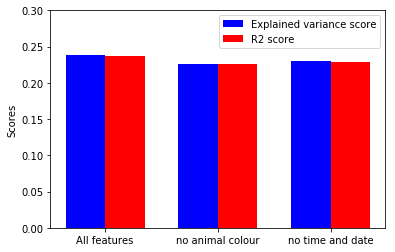

In [58]:
import numpy as np
import matplotlib.pyplot as plt

N = 3


ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, ev, width, color='b')


rects2 = ax.bar(ind + width, r2s, width, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('All features', 'no animal colour', 'no time and date'))

ax.legend((rects1[0], rects2[0]), ('Explained variance score', 'R2 score'))


plt.ylim([0, 0.3])



plt.show()

As shown by the bar chart, removing features affects the variance very little. 

In [202]:
fl = cn


Yl = fl.TimeInShelter
Xl=fl.drop('TimeInShelter', axis=1)

Xl.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

,sin_time,cos_time,sin_dat,cos_dat,ageAtShelt,IntakeType_CONFISCATE,IntakeType_ET REQUEST,IntakeType_FOSTER,IntakeType_FOUND,IntakeType_INVESTIGAT,...,SecondaryColor_SOLID,SecondaryColor_TAN,SecondaryColor_TORTIE,SecondaryColor_TORTIE POINT,SecondaryColor_TRICOLOR,SecondaryColor_WHITE,SecondaryColor_YELLOW,SecondaryColor_YELLOW BRINDLE,AnimalType_CAT,AnimalType_DOG
51,0.703368,0.043227,0.036733,0.312007,0.266798,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
69,0.550094,0.002516,0.231870,0.077707,0.313387,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99,0.060591,0.738579,0.973692,0.665814,0.249054,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
216,0.128428,0.165435,0.231870,0.077707,0.315979,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
229,0.515269,0.000233,0.047061,0.713659,0.701264,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
309,0.593262,0.008775,0.047061,0.713659,0.337964,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
419,0.408882,0.008373,0.013224,0.616222,0.315967,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
496,0.534878,0.001218,0.036733,0.312007,0.529797,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
655,0.462946,0.001375,0.930033,0.759249,0.295131,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
928,0.534878,0.001218,0.085137,0.220947,0.245386,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [203]:
Xl = np.array(Xl)
yl = np.array(Yl)

from sklearn.model_selection import train_test_split
X_trainl, X_testl, y_trainl, y_testl = train_test_split(Xl, yl,test_size=0.22)

In [206]:
from sklearn.neural_network import MLPRegressor
MINDl =MLPRegressor(hidden_layer_sizes=(300,),activation= 'logistic',learning_rate='constant',max_iter = 10000)
MINDl.fit(X_trainl,y_trainl)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [207]:
al =MINDl.predict(X_testl)

In [209]:
from sklearn.metrics import explained_variance_score, r2_score
explained_variance_score(y_testl, al) 

0.23869970104286042

In [211]:
r2_score(y_testl, al)

0.23862006958685467

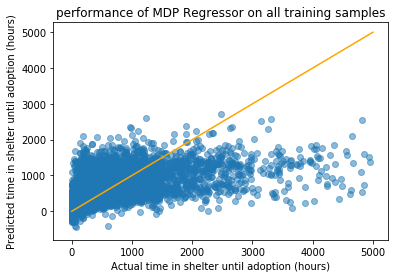

In [212]:
import numpy as np
import matplotlib.pyplot as plt
x = y_testl
y = al
xe = [x for x in range(5000)]
ye = [y for y in range(5000)]
plt.plot(xe,ye, color = 'orange')
plt.ylabel('Predicted time in shelter until adoption (hours)')
plt.xlabel('Actual time in shelter until adoption (hours)')
plt.title('performance of MDP Regressor on all training samples')

plt.scatter(x, y, alpha=0.5)
plt.show()

Using the most succesful model we found (MDP regressor, 1 hidden layer with 300 perceptrons) on all the availiable data with a 0.78:0.22 test train split, we achieved a explained variance score of 0.24, and an r2 score of 0.24, still showing a high variance between predicted and actual time spent until adoption.

We were unfortunately only able to show a very weak model for predicting time until adoption for shelter animals. Feature engineering showed very little impact on the results, thereby showing that the weakness of model is not down to overfitting, rather there are some aspects surrounding adoption unaccounted for in the dataset. In future work we could perhaps include economic data from the surrounding area, as this would have an impact on how readily families will adopt a pet.